In [ ]:
from google.colab import drive

drive.mount('/content/drive')
#root_path = 'drive/My Drive/Lab/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
print("Current working directory: "+os.getcwd())
default_path = '/content/drive/My Drive/Lab/API'
os.chdir(default_path)
print("Current working directory: "+os.getcwd())

Current working directory: /content
Current working directory: /content/drive/My Drive/Lab/API


## Import Support files and packages

In [ ]:
from utils import *
#from image_transform import ImageTransform
from loader import Loader
from resnet import *
from graph_plot import *
from albumentation_transform import AlbumentationTransformations
from train import TrainModel
from test import TestModel
#from misclassified_images import MissclassifiedImages as ms
from display_images import *
#from correct_classified_images import CorrectclassifiedImages as cs
from albumentations import *
from albumentations.pytorch.transforms import ToTensor

## Setup device

In [ ]:
# Device
SEED = 1
cuda = torch.cuda.is_available()
print("Cuda is available ?", cuda)
torch.manual_seed(SEED)
if cuda:
    torch.cuda.manual_seed(SEED)
device = torch.device("cuda" if cuda else "cpu")

Cuda is available ? True


## Hyperparameters

In [ ]:
IMAGE_PATH = "/content/drive/My Drive/Lab/Session 9 - Image_Augmentation_and_Class_Activation_Maps/"
MODEL_PATH = "/content/drive/My Drive/Lab/Session 9 - Image_Augmentation_and_Class_Activation_Maps/"

# For Graph
train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []

# Hyper parameters
LAMBDA1=1e-5
LR=0.1
MOMENTUM=0.9
WEIGHT_DECAY=0.0001    #
EPOCHS = 50
img_mean = (0.4914, 0.4822, 0.4465)
img_std = (0.2023, 0.1994, 0.2010)

## Data augmentation, Dataset, DataLoader

In [ ]:
# Transforms
means = np.array(img_mean)
stdevs = np.array(img_std)
patch_size = 28

# Define Train transforms and Test transforms
# Cutout(num_holes=1, max_h_size=16, max_w_size=16, p=0.75),
transform_train = [
     # 
      #HorizontalFlip(p = 0.5),
      #GaussianBlur(),
      
      # RandomBrightnessContrast(),
      # HueSaturationValue(),
      # Downscale(),
      # RandomSizedCrop((patch_size,patch_size), patch_size,patch_size),      
      # RandomBrightness(),
      # RandomContrast(),
      RandomRotate90(),
      HorizontalFlip(p = 0.5),
      # MotionBlur(),   
      Normalize(mean=means, std=stdevs),
      ToTensor()
    ]

transform_test = [Normalize(mean=means, std=stdevs),
      ToTensor()
    ]

# Create Train transforms and Test transforms
t_transform_train =  AlbumentationTransformations(transform_train)
t_transform_test = AlbumentationTransformations(transform_test)

# Dataset and DataLoader arguments
dataset_name = torchvision.datasets.CIFAR10
trainSet_dict = dict(root='./data', train=True, download=True, transform=t_transform_train)
trainLoad_dict = dict(batch_size=32, shuffle=True, num_workers=4)
testSet_dict = dict(root='./data', train=False, download=True, transform=t_transform_test)
testLoad_dict = dict(batch_size=32, shuffle=False, num_workers=4)


# Create Train Loader and Test Loader
trainloader = Loader.getDataLoader(dataset_name, trainSet_dict, trainLoad_dict)
testloader = Loader.getDataLoader(dataset_name, testSet_dict, testLoad_dict)
classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Loss Function, Optimizer and Scheduler

In [ ]:
# Loss Function
criterion = nn.CrossEntropyLoss()


# Optimizer
model = ResNet18().to(device)

optimizer = optim.SGD(model.parameters(), lr=LR, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)
scheduler = StepLR(optimizer, step_size=21, gamma=0.1)

## Model Summary (Layers and Parameter)

In [ ]:
# summary(model, input_size=(3, 32, 32))

## Start training

In [ ]:
for epoch in range(EPOCHS):
  train_loss, train_acc = TrainModel.train(model, device, trainloader, criterion, optimizer, epoch)
  scheduler.step()
  train_losses.append(train_loss)
  train_accuracy.append(train_acc)
  test_loss, test_acc = TestModel.test(model, device, testloader, criterion)
  test_losses.append(test_loss)
  test_accuracy.append(test_acc)

: EPOCH= 0 Loss= 1.7647 Batch_id= 1562 Accuracy= 28.92: 100%|██████████| 1563/1563 [01:05<00:00, 23.88it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0528 Batch_id= 312 Accuracy= 3793/10000 (37.93%)



: EPOCH= 1 Loss= 1.3779 Batch_id= 1562 Accuracy= 41.91: 100%|██████████| 1563/1563 [01:05<00:00, 23.92it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0402 Batch_id= 312 Accuracy= 5327/10000 (53.27%)



: EPOCH= 2 Loss= 1.3197 Batch_id= 1562 Accuracy= 53.57: 100%|██████████| 1563/1563 [01:05<00:00, 23.99it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0331 Batch_id= 312 Accuracy= 6395/10000 (63.95%)



: EPOCH= 3 Loss= 0.9571 Batch_id= 1562 Accuracy= 60.88: 100%|██████████| 1563/1563 [01:05<00:00, 23.93it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0288 Batch_id= 312 Accuracy= 6773/10000 (67.73%)



: EPOCH= 4 Loss= 0.9124 Batch_id= 1562 Accuracy= 66.07: 100%|██████████| 1563/1563 [01:05<00:00, 23.94it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0265 Batch_id= 312 Accuracy= 7073/10000 (70.73%)



: EPOCH= 5 Loss= 0.7391 Batch_id= 1562 Accuracy= 69.79: 100%|██████████| 1563/1563 [01:05<00:00, 24.01it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0217 Batch_id= 312 Accuracy= 7581/10000 (75.81%)



: EPOCH= 6 Loss= 0.6810 Batch_id= 1562 Accuracy= 72.39: 100%|██████████| 1563/1563 [01:05<00:00, 23.95it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0234 Batch_id= 312 Accuracy= 7479/10000 (74.79%)



: EPOCH= 7 Loss= 0.4785 Batch_id= 1562 Accuracy= 74.30: 100%|██████████| 1563/1563 [01:05<00:00, 24.01it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0218 Batch_id= 312 Accuracy= 7598/10000 (75.98%)



: EPOCH= 8 Loss= 0.9736 Batch_id= 1562 Accuracy= 75.71: 100%|██████████| 1563/1563 [01:05<00:00, 24.04it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0180 Batch_id= 312 Accuracy= 8091/10000 (80.91%)



: EPOCH= 9 Loss= 1.0301 Batch_id= 1562 Accuracy= 76.80: 100%|██████████| 1563/1563 [01:05<00:00, 23.78it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0198 Batch_id= 312 Accuracy= 7857/10000 (78.57%)



: EPOCH= 10 Loss= 0.6526 Batch_id= 1562 Accuracy= 77.87: 100%|██████████| 1563/1563 [01:05<00:00, 23.89it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0174 Batch_id= 312 Accuracy= 8097/10000 (80.97%)



: EPOCH= 11 Loss= 0.3518 Batch_id= 1562 Accuracy= 78.68: 100%|██████████| 1563/1563 [01:05<00:00, 23.87it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0210 Batch_id= 312 Accuracy= 7725/10000 (77.25%)



: EPOCH= 12 Loss= 0.7924 Batch_id= 1562 Accuracy= 79.42: 100%|██████████| 1563/1563 [01:05<00:00, 23.97it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0188 Batch_id= 312 Accuracy= 8003/10000 (80.03%)



: EPOCH= 13 Loss= 0.4039 Batch_id= 1562 Accuracy= 79.90: 100%|██████████| 1563/1563 [01:05<00:00, 23.97it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0169 Batch_id= 312 Accuracy= 8162/10000 (81.62%)



: EPOCH= 14 Loss= 0.5357 Batch_id= 1562 Accuracy= 80.17: 100%|██████████| 1563/1563 [01:05<00:00, 23.94it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0167 Batch_id= 312 Accuracy= 8180/10000 (81.80%)



: EPOCH= 15 Loss= 0.4189 Batch_id= 1562 Accuracy= 81.08: 100%|██████████| 1563/1563 [01:05<00:00, 23.87it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0155 Batch_id= 312 Accuracy= 8360/10000 (83.60%)



: EPOCH= 16 Loss= 0.4700 Batch_id= 1562 Accuracy= 81.54: 100%|██████████| 1563/1563 [01:05<00:00, 23.96it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0152 Batch_id= 312 Accuracy= 8310/10000 (83.10%)



: EPOCH= 17 Loss= 0.4660 Batch_id= 1562 Accuracy= 81.81: 100%|██████████| 1563/1563 [01:05<00:00, 23.86it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0142 Batch_id= 312 Accuracy= 8484/10000 (84.84%)



: EPOCH= 18 Loss= 0.4630 Batch_id= 1562 Accuracy= 82.06: 100%|██████████| 1563/1563 [01:05<00:00, 23.97it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0170 Batch_id= 312 Accuracy= 8210/10000 (82.10%)



: EPOCH= 19 Loss= 0.6926 Batch_id= 1562 Accuracy= 82.47: 100%|██████████| 1563/1563 [01:05<00:00, 24.01it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0169 Batch_id= 312 Accuracy= 8220/10000 (82.20%)



: EPOCH= 20 Loss= 0.6291 Batch_id= 1562 Accuracy= 82.30: 100%|██████████| 1563/1563 [01:05<00:00, 23.87it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0169 Batch_id= 312 Accuracy= 8208/10000 (82.08%)



: EPOCH= 21 Loss= 0.4279 Batch_id= 1562 Accuracy= 88.97: 100%|██████████| 1563/1563 [01:05<00:00, 23.89it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0100 Batch_id= 312 Accuracy= 8928/10000 (89.28%)



: EPOCH= 22 Loss= 0.3373 Batch_id= 1562 Accuracy= 90.66: 100%|██████████| 1563/1563 [01:05<00:00, 23.95it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0096 Batch_id= 312 Accuracy= 8957/10000 (89.57%)



: EPOCH= 23 Loss= 0.6747 Batch_id= 1562 Accuracy= 91.74: 100%|██████████| 1563/1563 [01:05<00:00, 23.98it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0096 Batch_id= 312 Accuracy= 8981/10000 (89.81%)



: EPOCH= 24 Loss= 0.3338 Batch_id= 1562 Accuracy= 92.25: 100%|██████████| 1563/1563 [01:05<00:00, 23.95it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0095 Batch_id= 312 Accuracy= 8992/10000 (89.92%)



: EPOCH= 25 Loss= 0.2507 Batch_id= 1562 Accuracy= 92.89: 100%|██████████| 1563/1563 [01:05<00:00, 23.95it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0095 Batch_id= 312 Accuracy= 9024/10000 (90.24%)



: EPOCH= 26 Loss= 0.0874 Batch_id= 1562 Accuracy= 93.19: 100%|██████████| 1563/1563 [01:05<00:00, 23.97it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0095 Batch_id= 312 Accuracy= 8994/10000 (89.94%)



: EPOCH= 27 Loss= 0.3170 Batch_id= 1562 Accuracy= 93.68: 100%|██████████| 1563/1563 [01:05<00:00, 23.90it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0096 Batch_id= 312 Accuracy= 9007/10000 (90.07%)



: EPOCH= 28 Loss= 0.5854 Batch_id= 1562 Accuracy= 94.11: 100%|██████████| 1563/1563 [01:05<00:00, 23.99it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0097 Batch_id= 312 Accuracy= 9027/10000 (90.27%)



: EPOCH= 29 Loss= 0.1491 Batch_id= 1562 Accuracy= 94.36: 100%|██████████| 1563/1563 [01:05<00:00, 23.86it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0100 Batch_id= 312 Accuracy= 8994/10000 (89.94%)



: EPOCH= 30 Loss= 0.1806 Batch_id= 1562 Accuracy= 94.76: 100%|██████████| 1563/1563 [01:05<00:00, 23.85it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0100 Batch_id= 312 Accuracy= 9021/10000 (90.21%)



: EPOCH= 31 Loss= 0.0428 Batch_id= 1562 Accuracy= 95.03: 100%|██████████| 1563/1563 [01:05<00:00, 23.95it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0098 Batch_id= 312 Accuracy= 8990/10000 (89.90%)



: EPOCH= 32 Loss= 0.1733 Batch_id= 1562 Accuracy= 95.11: 100%|██████████| 1563/1563 [01:05<00:00, 23.93it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0105 Batch_id= 312 Accuracy= 8988/10000 (89.88%)



: EPOCH= 33 Loss= 0.1475 Batch_id= 1562 Accuracy= 95.38: 100%|██████████| 1563/1563 [01:05<00:00, 24.02it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0102 Batch_id= 312 Accuracy= 9005/10000 (90.05%)



: EPOCH= 34 Loss= 0.3801 Batch_id= 1562 Accuracy= 95.52: 100%|██████████| 1563/1563 [01:05<00:00, 23.84it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0104 Batch_id= 312 Accuracy= 8985/10000 (89.85%)



: EPOCH= 35 Loss= 0.2383 Batch_id= 1562 Accuracy= 95.62: 100%|██████████| 1563/1563 [01:05<00:00, 23.91it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0109 Batch_id= 312 Accuracy= 8960/10000 (89.60%)



: EPOCH= 36 Loss= 0.1350 Batch_id= 1562 Accuracy= 95.90: 100%|██████████| 1563/1563 [01:05<00:00, 23.87it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0105 Batch_id= 312 Accuracy= 8977/10000 (89.77%)



: EPOCH= 37 Loss= 0.0815 Batch_id= 1562 Accuracy= 95.90: 100%|██████████| 1563/1563 [01:05<00:00, 23.89it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0108 Batch_id= 312 Accuracy= 8994/10000 (89.94%)



: EPOCH= 38 Loss= 0.1705 Batch_id= 1562 Accuracy= 96.01: 100%|██████████| 1563/1563 [01:05<00:00, 23.96it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0103 Batch_id= 312 Accuracy= 9014/10000 (90.14%)



: EPOCH= 39 Loss= 0.0553 Batch_id= 1562 Accuracy= 96.26: 100%|██████████| 1563/1563 [01:04<00:00, 24.06it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0110 Batch_id= 312 Accuracy= 8943/10000 (89.43%)



: EPOCH= 40 Loss= 0.1224 Batch_id= 1562 Accuracy= 96.23: 100%|██████████| 1563/1563 [01:05<00:00, 23.93it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0106 Batch_id= 312 Accuracy= 8986/10000 (89.86%)



: EPOCH= 41 Loss= 0.0080 Batch_id= 1562 Accuracy= 96.12: 100%|██████████| 1563/1563 [01:05<00:00, 23.97it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0113 Batch_id= 312 Accuracy= 8943/10000 (89.43%)



: EPOCH= 42 Loss= 0.0829 Batch_id= 1562 Accuracy= 96.86: 100%|██████████| 1563/1563 [01:05<00:00, 23.92it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0101 Batch_id= 312 Accuracy= 9047/10000 (90.47%)



: EPOCH= 43 Loss= 0.1192 Batch_id= 1562 Accuracy= 97.44: 100%|██████████| 1563/1563 [01:05<00:00, 23.90it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0100 Batch_id= 312 Accuracy= 9058/10000 (90.58%)



: EPOCH= 44 Loss= 0.0514 Batch_id= 1562 Accuracy= 97.58: 100%|██████████| 1563/1563 [01:05<00:00, 24.04it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0100 Batch_id= 312 Accuracy= 9049/10000 (90.49%)



: EPOCH= 45 Loss= 0.0130 Batch_id= 1562 Accuracy= 97.70: 100%|██████████| 1563/1563 [01:05<00:00, 23.97it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0102 Batch_id= 312 Accuracy= 9051/10000 (90.51%)



: EPOCH= 46 Loss= 0.0756 Batch_id= 1562 Accuracy= 97.74: 100%|██████████| 1563/1563 [01:05<00:00, 23.94it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0101 Batch_id= 312 Accuracy= 9063/10000 (90.63%)



: EPOCH= 47 Loss= 0.2118 Batch_id= 1562 Accuracy= 97.84: 100%|██████████| 1563/1563 [01:05<00:00, 23.93it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0102 Batch_id= 312 Accuracy= 9050/10000 (90.50%)



: EPOCH= 48 Loss= 0.0313 Batch_id= 1562 Accuracy= 97.95: 100%|██████████| 1563/1563 [01:05<00:00, 23.91it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average Loss= 0.0102 Batch_id= 312 Accuracy= 9055/10000 (90.55%)



: EPOCH= 49 Loss= 0.0436 Batch_id= 1562 Accuracy= 97.97: 100%|██████████| 1563/1563 [01:05<00:00, 24.05it/s]



Test set: Average Loss= 0.0103 Batch_id= 312 Accuracy= 9044/10000 (90.44%)



In [ ]:
PATH = "/content/drive/My Drive/Lab/Session 9 - Image_Augmentation_and_Class_Activation_Maps"

## Show and Save losses and accuracy Plot

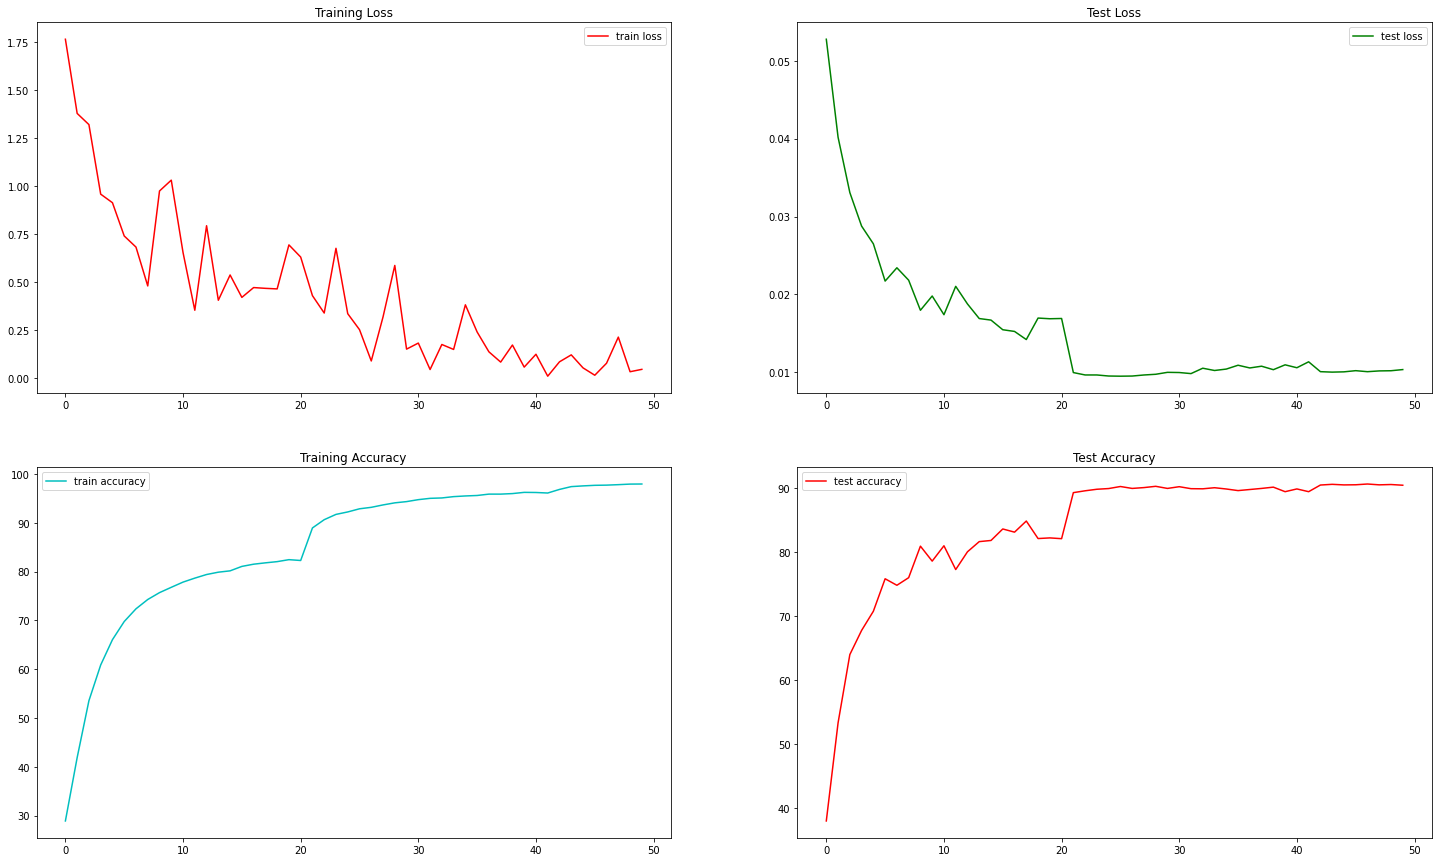

In [ ]:
getPlottedGraph(EPOCHS, train_losses, train_accuracy, test_losses, test_accuracy,name="S9_plot_final", PATH=PATH+str("/visualization/"))

## Save model

In [ ]:
torch.save(model.state_dict(), MODEL_PATH+"S9_model_final.pth")

## Load model

In [ ]:
model = ResNet18().to(device)
checkpoint = torch.load(MODEL_PATH+"S9_model_final.pth")
model.load_state_dict(checkpoint)

<All keys matched successfully>

## Show and Save correct classified images

/content/drive/My Drive/Lab/API/display_images.py:134: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  misclassified_imgs_indexes = (pred.eq(target.view_as(pred)) == False).nonzero()[:, 0]


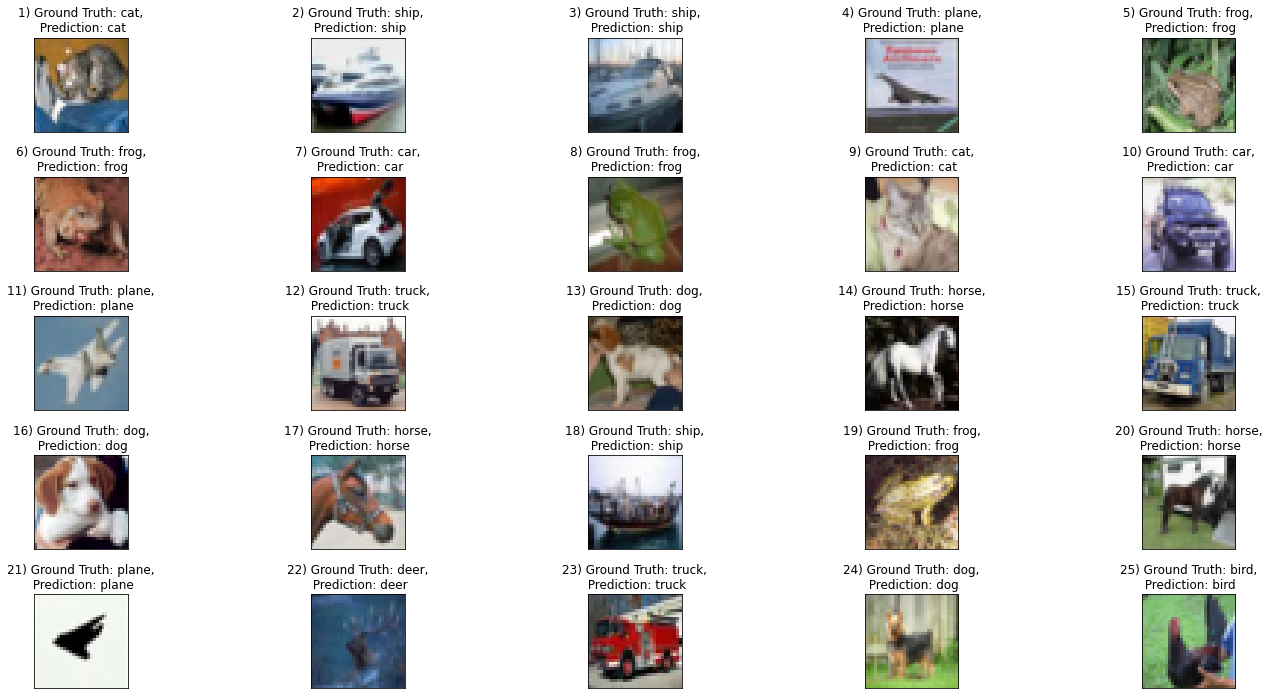

In [ ]:

show_save_correctly_classified_images(model, testloader, device, PATH, name="correct_classified_imgs", max_correctly_classified_images_imgs=25,labels_list=classes)

## Show and Save misclassified images

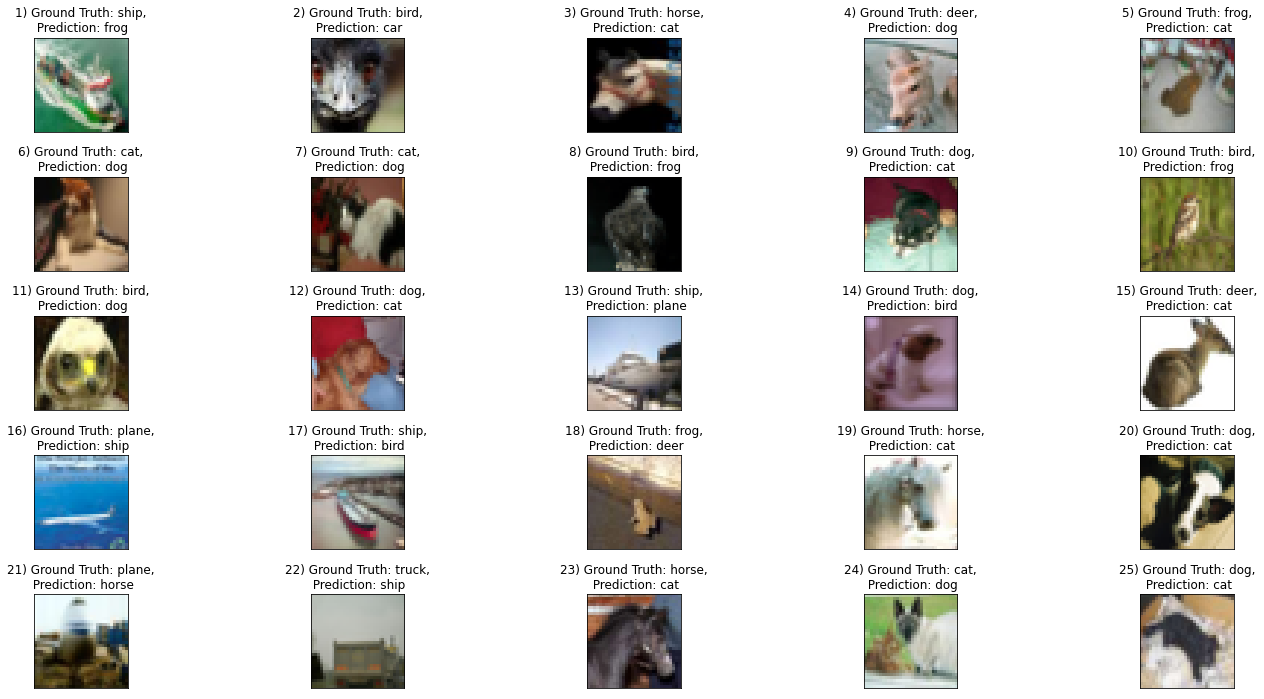

In [ ]:
show_save_misclassified_images(model, testloader, device, PATH, name="misclassified_imgs", max_misclassified_imgs=25,labels_list=classes)

## Grad Cam

In [ ]:
misclassified_imgs, correctly_classified_images = classify_images(model, testloader, device, 5)

In [ ]:
from grad_cam import *

In [ ]:
layers_list = ["layer1","layer2","layer3","layer4"]
display_gradcam = VisualizeCam(model, classes, layers_list)

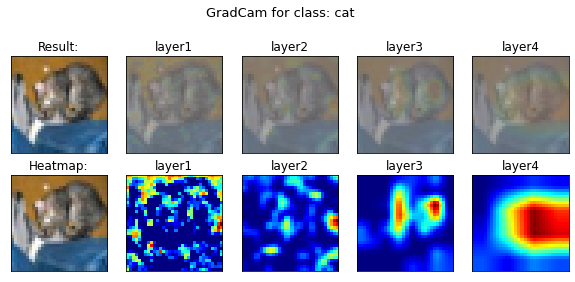

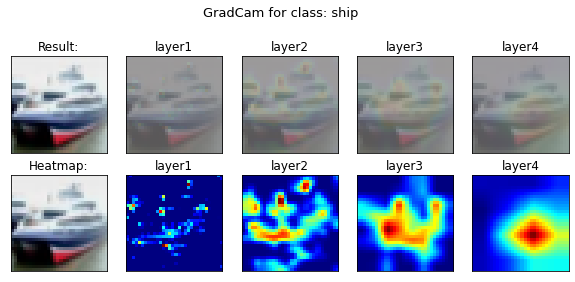

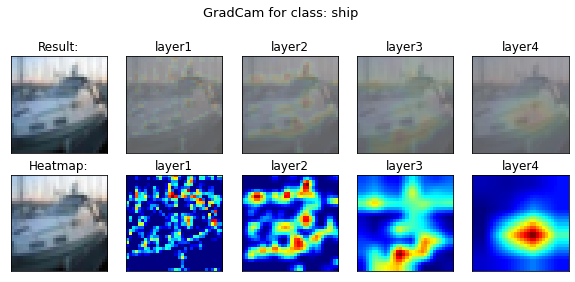

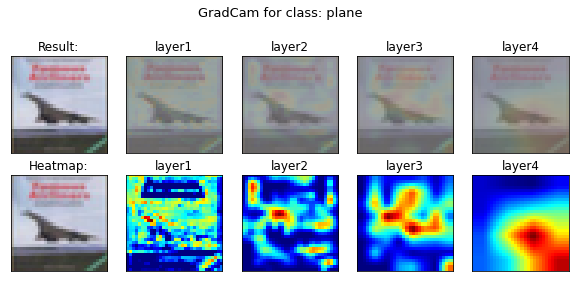

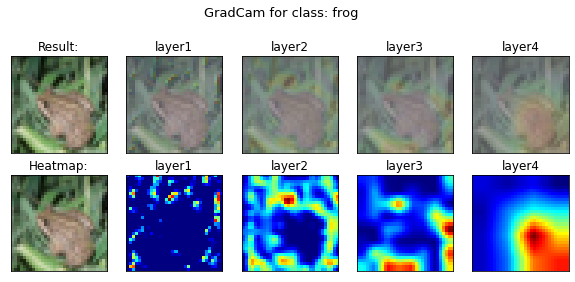

In [ ]:
correct_pred_imgs = []
for i in range(len(correctly_classified_images)):
  correct_pred_imgs.append(torch.as_tensor(correctly_classified_images[i]["img"]))
display_gradcam(torch.stack(correct_pred_imgs), layers_list, PATH+str("/visualization"), metric="correct")

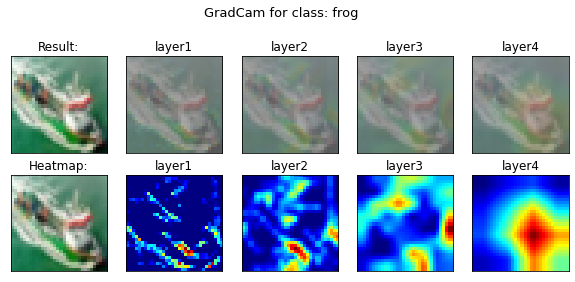

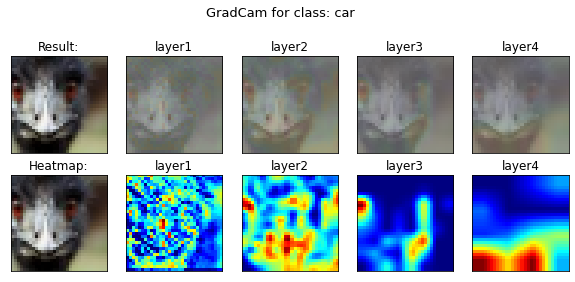

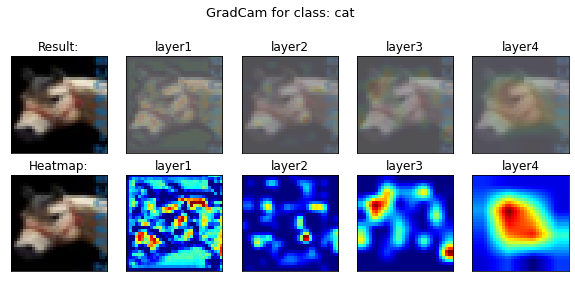

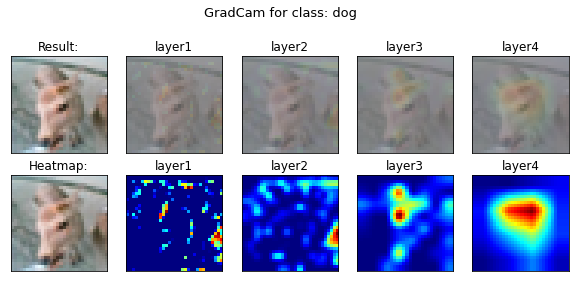

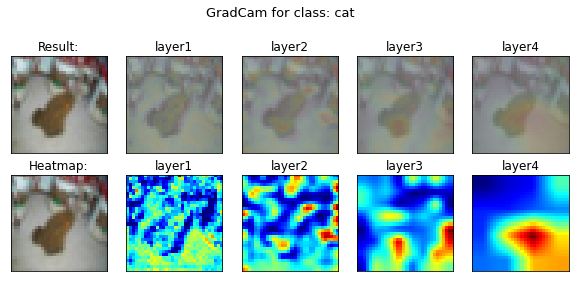

In [ ]:
misclassify_pred_imgs = []
for i in range(len(misclassified_imgs)):
  misclassify_pred_imgs.append(torch.as_tensor(misclassified_imgs[i]["img"]))
display_gradcam(torch.stack(misclassify_pred_imgs), layers_list, PATH+str("/visualization"), metric="misclassify")